# Coursera Capstone - The Battle of Neighbourhoods

***

## Choosing an appropriate residential location at a new unknown place

***

### _Introduction:_
- __IT Professional from India__
- __Office location changed to Pune City__
- __Looking for a Residential Place with- (1) number of Modern amenities and (2) as close as possible to the office located in Hinjewadi area__
- __With feedback from friend_circle and web search two areas were shortlisted for comparison: 'Kothrud' and 'Aundh'__

### __This program helps to choose between two neighborhoods based on above two parameters__

***

#### _Imporitng all required libraries_

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy import distance # calculate geodesic distance between two coordinates

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Data Collection :

#### _Fetching coordinates for all three locations_

In [5]:
address = 'Hinjawadi, Pune'

geolocator = Nominatim(user_agent="lionsuneel@gmail.com")
location = geolocator.geocode(address)
hin_latitude = location.latitude
hin_longitude = location.longitude
hin_coord = (hin_latitude, hin_longitude)
print('The geograpical coordinate of Hinjawadi, Pune are {}, {}.'.format(hin_latitude, hin_longitude))

The geograpical coordinate of Hinjawadi, Pune are 18.59406345, 73.74204911007135.


In [6]:
address = 'Kothrud, Pune'

geolocator = Nominatim(user_agent="lionsuneel@gmail.com")
location = geolocator.geocode(address)
kot_latitude = location.latitude
kot_longitude = location.longitude
kot_coord = (kot_latitude, kot_longitude)
print('The geograpical coordinate of Kothrud, Pune are {}, {}.'.format(kot_latitude, kot_longitude))

The geograpical coordinate of Kothrud, Pune are 18.5038889, 73.807673.


In [7]:
address = 'Aundh, Pune'

geolocator = Nominatim(user_agent="lionsuneel@gmail.com")
location = geolocator.geocode(address)
aun_latitude = location.latitude
aun_longitude = location.longitude
aun_coord = (aun_latitude, aun_longitude)
print('The geograpical coordinate of Aundh, Pune are {}, {}.'.format(aun_latitude, aun_longitude))

The geograpical coordinate of Aundh, Pune are 18.5618834, 73.8101957.


#### _Setting Foursquare parameters_

In [8]:
CLIENT_ID = 'R3BN00GPVEHLA0Q3IPUFAMLMH0GDJUJBZVPEMA5TLF1MH41S' # Foursquare ID
CLIENT_SECRET = 'PRY2KKEUATNZEVQW4ZYDPTJY5E3DFMA3TO5SATPCZWWLMUKT' # Foursquare Secret
VERSION = '20200807' # today's date

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R3BN00GPVEHLA0Q3IPUFAMLMH0GDJUJBZVPEMA5TLF1MH41S
CLIENT_SECRET:PRY2KKEUATNZEVQW4ZYDPTJY5E3DFMA3TO5SATPCZWWLMUKT


#### _Set radial distance of 4 kms and number of venues to be fetched in one API call to Foursquare_

In [9]:
radius = 4000 # Foursquare API requires distance to be mentioned in meters
no_of_venues = 100 # max number of records that could be fetched through one API call

#### _Define a function to fetch categories_

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### _Fetching venues from Foursquare in a dataframe for 'Kothrud' location_

In [14]:
offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        kot_latitude, 
                                                                        kot_longitude, 
                                                                        radius,
                                                                        no_of_venues,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km for Kothrud Location".format(venues_fetched, radius/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100
                
foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched in Kothrud".format(total_venues))

Total 96 venues fetched within a total radius of 4.0 Km for Kothrud Location

Total 96 venues fetched in Kothrud


#### _Fetching venues from Foursquare in a dataframe for 'Aundh' location_

In [15]:
offset = 0
total_venues = 0
foursq_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        aun_latitude, 
                                                                        aun_longitude, 
                                                                        radius,
                                                                        no_of_venues,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km from Aundh Location".format(venues_fetched, radius/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursq_venues = pd.concat([foursq_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100
        
foursq_venues = foursq_venues.reset_index(drop = True)
print("\nTotal {} venues fetched in Aundh".format(total_venues))

Total 100 venues fetched within a total radius of 4.0 Km from Aundh Location
Total 24 venues fetched within a total radius of 4.0 Km from Aundh Location

Total 124 venues fetched in Aundh


### Data Refinement, Data Visualization and Calculations :

#### _Plotting venues fetched for both the locations on a map using 'Folium'_

In [19]:
kothrud_map = folium.Map(location = [kot_latitude, kot_longitude], zoom_start = 12)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(kothrud_map)  

# kothrud_map.save("maps/Venues by Foursquare.html")


# aundh_map = folium.Map(location = [aun_latitude, aun_longitude], zoom_start = 12)

for name, latitude, longitude in zip(foursq_venues['name'], foursq_venues['lat'], foursq_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(kothrud_map)  

# kothrud_map.save("maps/Venues by Foursquare.html")
kothrud_map
# figuremap.add_child(kothrud_map)
# figuremap.add_child(aundh_map)

In [20]:
foursquare_venues.shape

(96, 4)

In [21]:
foursq_venues.shape

(124, 4)

#### _Storing data from both the dataframes to csv files as lot of difficulties were faced while placing API calls on Foursquare_

In [22]:
foursquare_venues.to_csv('foursquare_venues_kot42', sep=",", encoding='utf-8')
foursq_venues.to_csv('foursq_venues_aundh42', sep=",", encoding='utf-8')

In [23]:
foursquare_venues.dtypes

name           object
categories     object
lat           float64
lng           float64
dtype: object

In [24]:
foursquare_venues.rename(columns = {'categories':'Kothrud'}, inplace = True)

In [25]:
foursquare_venues.dtypes

name        object
Kothrud     object
lat        float64
lng        float64
dtype: object

In [26]:
foursq_venues.rename(columns = {'categories':'Aundh'}, inplace = True)

In [27]:
foursq_venues.dtypes

name      object
Aundh     object
lat      float64
lng      float64
dtype: object

In [28]:
kothrud_df = foursquare_venues.Kothrud.value_counts()
aundh_df = foursq_venues.Aundh.value_counts()

In [29]:
dataset = pd.concat([kothrud_df, aundh_df], axis=1)

In [30]:
dataset.dtypes

Kothrud    float64
Aundh      float64
dtype: object

In [31]:
dataset

,Kothrud,Aundh
Café,15.0,5.0
Indian Restaurant,14.0,16.0
Fast Food Restaurant,4.0,6.0
Bakery,4.0,5.0
Coffee Shop,4.0,7.0
Chinese Restaurant,3.0,6.0
Pizza Place,3.0,2.0
Snack Place,3.0,2.0
Dessert Shop,3.0,2.0
Asian Restaurant,3.0,4.0


#### _Choose comparison for top 15 categories among two localities_

In [32]:
dataset.sort_values(['Aundh'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top15 = dataset.head(15)

# transpose the dataframe
# df_top10 = df_top10[years].transpose() 

df_top15

,Kothrud,Aundh
Indian Restaurant,14.0,16.0
Lounge,2.0,8.0
Coffee Shop,4.0,7.0
Fast Food Restaurant,4.0,6.0
Chinese Restaurant,3.0,6.0
Ice Cream Shop,2.0,6.0
Café,15.0,5.0
Bakery,4.0,5.0
Asian Restaurant,3.0,4.0
Breakfast Spot,1.0,3.0


#### _Plotting venue counts for each category from both the locations on a bar chart for comparison_

In [33]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


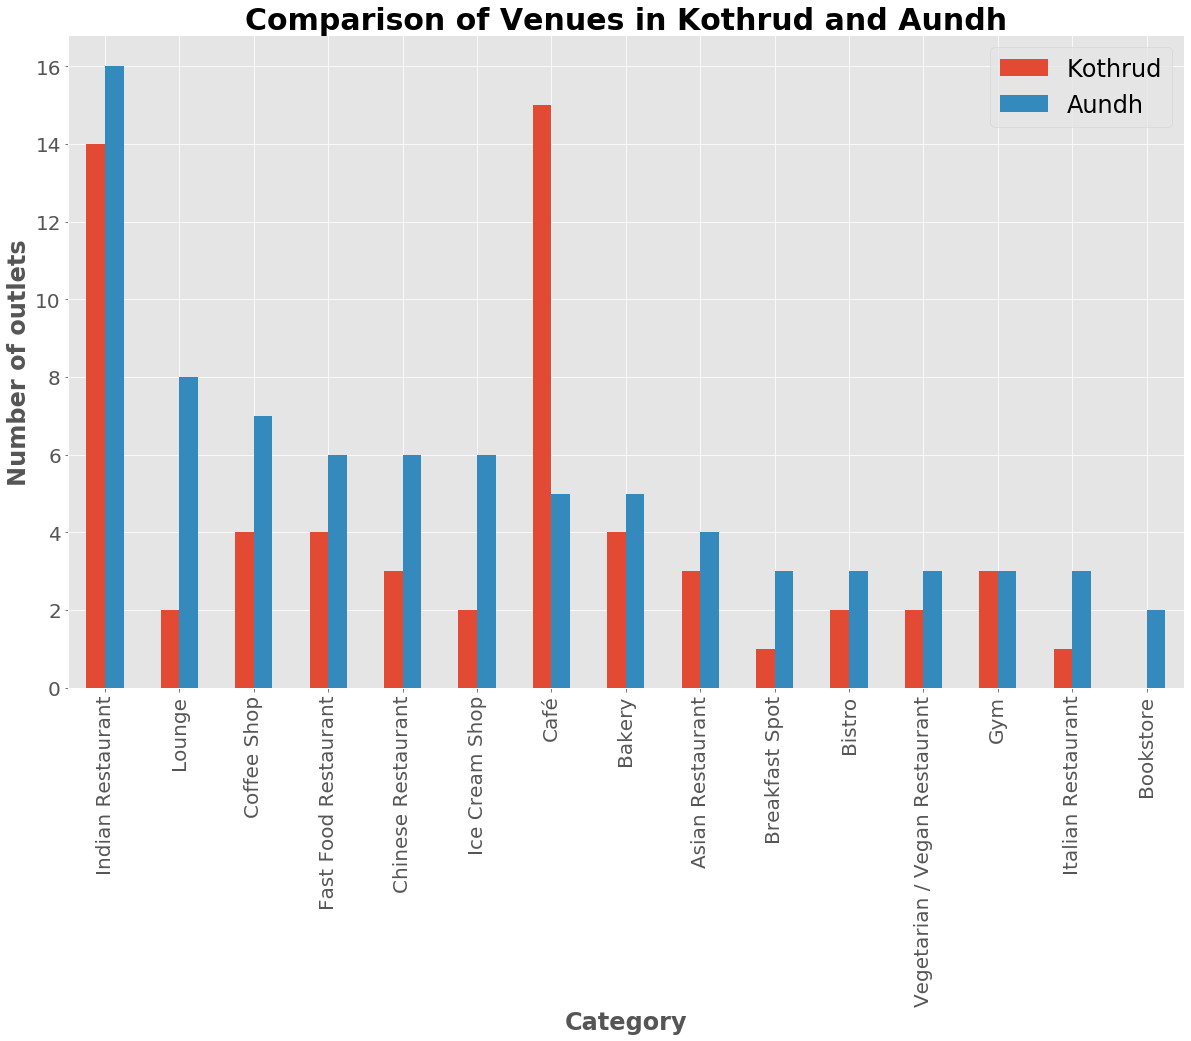

In [35]:
# step 2: plot data
df_top15.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Category', fontsize=24, fontweight='bold') # add to x-label to the plot
plt.ylabel('Number of outlets', fontsize=24, fontweight='bold') # add y-label to the plot
plt.title('Comparison of Venues in Kothrud and Aundh', fontsize=30, fontweight='bold') # add title to the plot
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('legend',fontsize=30)
plt.show()

#### _Calculate geodesic distance between office and both locations_

In [36]:
def calc_distance(from_loc, to_loc):
    return distance.distance(from_loc, to_loc)

In [37]:
print("Distance from Hinjawadi to Kothrud: ", calc_distance(hin_coord, kot_coord))
print("AND")
print("Distance from Hinjawadi to Aundh: ", calc_distance(hin_coord, aun_coord))

Distance from Hinjawadi to Kothrud:  12.149941753959334 km
AND
Distance from Hinjawadi to Aundh:  8.02677846599389 km


### Conclusion :

### _Aundh is preferred location over Kothrud as ..._

#### _(1) Aundh has got more number of venues (124) as compared to Kothrud (96)_
####  _(2) Top-15 categories show more numbers in Aundh except for one_
#### _(3) Aundh is more closer to the office (8.0 kms) as compared to Kothrud (12.1 kms)_

### ----- End of program -----

***

###### Author: Sunilsing Patil